In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

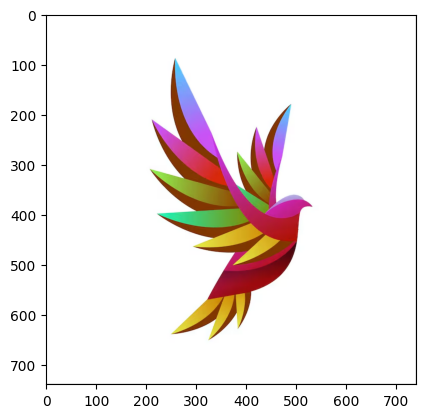

In [ ]:
img = cv2.imread('lpaf.jpg')
plt.imshow(img)

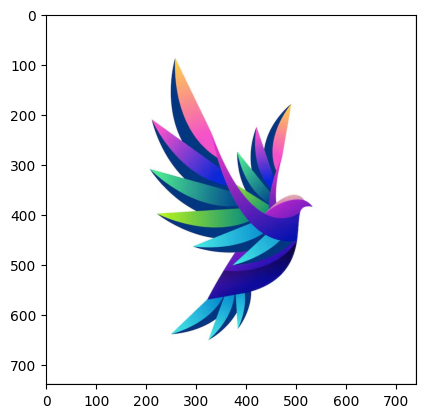

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

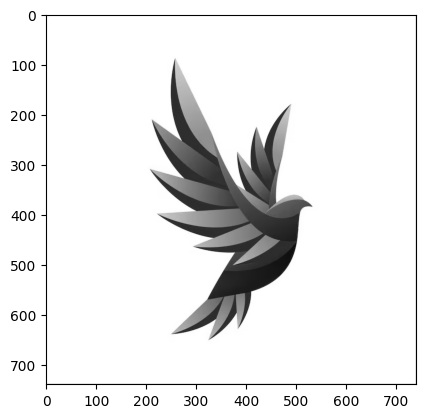

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')

In [ ]:
mean = 0
sigma = 25
noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)

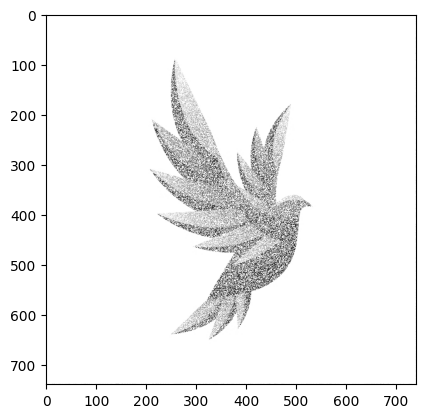

In [ ]:
noisy_img = cv2.add(img, noise)
plt.imshow(noisy_img, cmap='gray')

In [ ]:
mean_mask = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])
mean_mask = mean_mask/10
print(mean_mask)

[[0.1 0.1 0.1]
 [0.1 0.2 0.1]
 [0.1 0.1 0.1]]


AVERAGE MASK ON NORMAL GRAY IMAGE

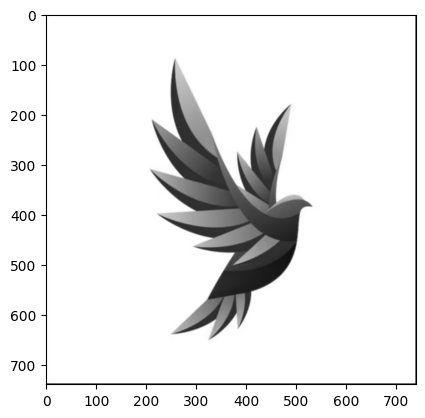

In [ ]:
lpaf_img = np.zeros(img.shape, dtype=np.uint8)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        lpaf_img[i,j] = img[i-1,j-1]*mean_mask[0,0] + img[i-1,j]*mean_mask[0,1] + img[i-1,j+1]*mean_mask[0,2] + img[i,j-1]*mean_mask[1,0] + img[i,j]*mean_mask[1,1] + img[i,j+1]*mean_mask[1,2] + img[i+1,j-1]*mean_mask[2,0] + img[i+1,j]*mean_mask[2,1] + img[i+1,j+1]*mean_mask[2,2]

plt.imshow(lpaf_img, cmap='gray')

AVERAGE MASK ON NOISY IMAGE

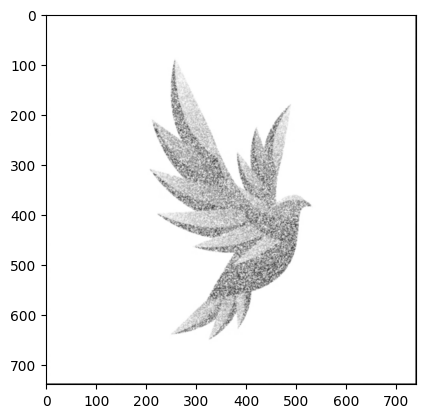

In [ ]:
lpaf_img = np.zeros(img.shape, dtype=np.uint8)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        lpaf_img[i,j] = noisy_img[i-1,j-1]*mean_mask[0,0] + noisy_img[i-1,j]*mean_mask[0,1] + noisy_img[i-1,j+1]*mean_mask[0,2] + noisy_img[i,j-1]*mean_mask[1,0] + noisy_img[i,j]*mean_mask[1,1] + noisy_img[i,j+1]*mean_mask[1,2] + noisy_img[i+1,j-1]*mean_mask[2,0] + noisy_img[i+1,j]*mean_mask[2,1] + noisy_img[i+1,j+1]*mean_mask[2,2]

plt.imshow(lpaf_img, cmap='gray')

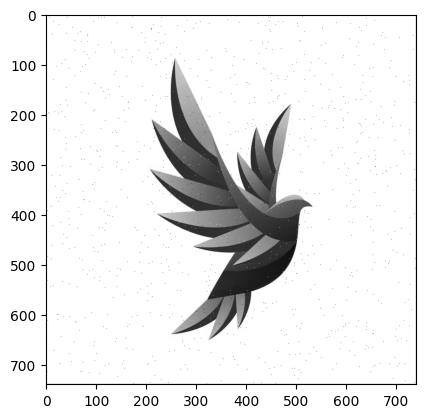

In [ ]:
import random

sp_noise_img = img.copy()
for i in range(1000):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    sp_noise_img[x,y] = 255

for i in range(1000):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    sp_noise_img[x,y] = 0

plt.imshow(sp_noise_img, cmap='gray')

In [ ]:
lpmf_img = np.zeros(img.shape, dtype="uint8")
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      lpmf_img[i, j] = np.median(sp_noise_img[i-1:i+2, j-1:j+2])


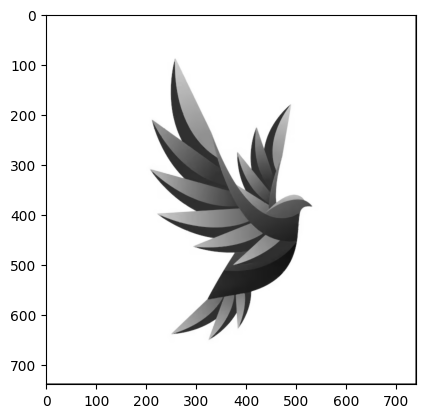

In [ ]:
plt.imshow(lpmf_img, cmap='gray')